In [292]:
import matplotlib.pyplot as plt
from math import *

In [293]:
def reductiveTrig(f, x):
    '''
    f: a string of the name of a trig function
    x: a value *in radians*
    '''
    entries = {
        'sin': sin(x),
        'cos': cos(x),
        'tan': sin(x)/cos(x) if cos(x) != 0 else inf,
        'sec': 1/cos(x) if cos(x) != 0 else inf,
        'csc': 1/sin(x) if sin(x) != 0 else inf,
        'cot': cos(x)/sin(x) if sin(x) != 0 else inf
    }
    return entries.get(
        f, 'Please enter as a string to the function either \
"sin", "cos", "tan", "csc", "sec", or "cot".' 
    )

In [294]:
spAngles = [0, pi/6, pi/4, pi/3, pi/2, 2*pi/3, 3*pi/4, 5*pi/6, pi, 7*pi/6, 
            5*pi/4, 4*pi/3, 3*pi/2, 5*pi/3, 7*pi/4, 11*pi/6, 2*pi]

unitCircle = [radians(i) for i in range(0,360)]

In [295]:
def getTrigVals(
    trigFunc, period=2*pi, amplitude=1, phaseShift=0, phaseShiftLeft=False, verticalShift=0, 
    verticalShiftDown=False, xVals=unitCircle, reflectX=False, reflectY=False
):
    
    if trigFunc not in ['sin', 'cos', 'tan', 'sec', 'csc', 'cot']:
        raise TypeError('Set `trigFunc` to *the string* "sin", "cos", "tan", "csc", "sec", or "cot".')
    try:
        b = 2*pi/period
        c = b*phaseShift
    except:
        raise ValueError('Period must be a number not equal to 0.')
    if amplitude == 0:
        raise ValueError('An amplitude of 0 yields a horizontal line, not a trig function.') 
    if amplitude < 0:
        raise ValueError('Amplitude cannot be negative. Set `reflectX=True` instead.')
    phaseDirection = -1 if phaseShiftLeft == True else 1
    verticalDirection = -1 if verticalShiftDown == True else 1
    rX = -1 if reflectX == True else 1
    rY = -1 if reflectY == True else 1
    
    trigVals = []
    
    for u in xVals:
        v = (amplitude*rY)*reductiveTrig(trigFunc, b*u - c*phaseDirection) + verticalShift*verticalDirection
        if v == inf:
            trigVals.extend([(u, inf), (u, -inf)])
        else:
            trigVals.append((u,v))
            
    return trigVals

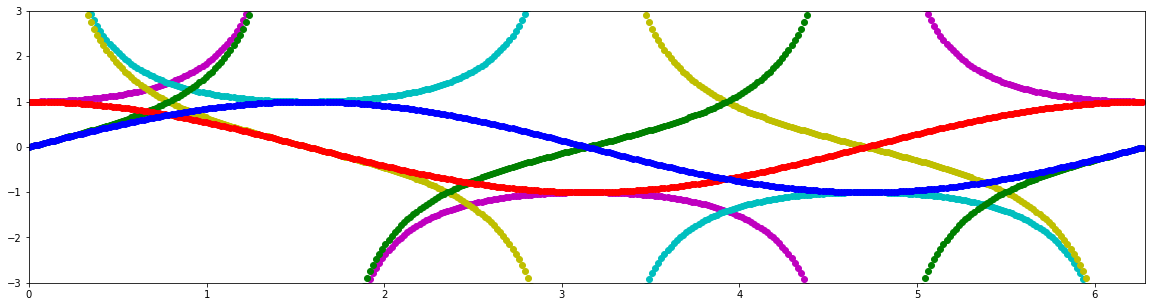

In [296]:
plt.figure(figsize=(20,5))
axes = plt.gca()
axes.set_xlim([0,2*pi])
axes.set_ylim([-3,3])

plt.plot(
    [p[0] for p in getTrigVals('sec')], 
    [p[1] for p in getTrigVals('sec')], 
    'mo')
plt.plot(
    [p[0] for p in getTrigVals('csc')], 
    [p[1] for p in getTrigVals('csc')], 
    'co')
plt.plot(
    [p[0] for p in getTrigVals('cot')], 
    [p[1] for p in getTrigVals('cot')], 
    'yo')
plt.plot(
    [p[0] for p in getTrigVals('tan')], 
    [p[1] for p in getTrigVals('tan')], 
    'go')
plt.plot(
    [p[0] for p in getTrigVals('cos')], 
    [p[1] for p in getTrigVals('cos')], 
    'ro')
plt.plot(
    [p[0] for p in getTrigVals('sin')], 
    [p[1] for p in getTrigVals('sin')], 
    'bo')

plt.show()